In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
df = pd.read_csv('covid_vaccination\country_vaccinations.csv')

In [3]:
df.shape

(30037, 15)

In [4]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30032,Zimbabwe,ZWE,2021-07-05,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1413627983...
30033,Zimbabwe,ZWE,2021-07-06,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1413627983...
30034,Zimbabwe,ZWE,2021-07-07,1398757.0,819058.0,579699.0,16190.0,9474.0,9.41,5.51,3.90,637.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1413627983...
30035,Zimbabwe,ZWE,2021-07-08,1433578.0,848808.0,584770.0,34821.0,13088.0,9.65,5.71,3.93,881.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1413627983...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              30037 non-null  object 
 1   iso_code                             30037 non-null  object 
 2   date                                 30037 non-null  object 
 3   total_vaccinations                   16781 non-null  float64
 4   people_vaccinated                    15935 non-null  float64
 5   people_fully_vaccinated              13168 non-null  float64
 6   daily_vaccinations_raw               13863 non-null  float64
 7   daily_vaccinations                   29800 non-null  float64
 8   total_vaccinations_per_hundred       16781 non-null  float64
 9   people_vaccinated_per_hundred        15935 non-null  float64
 10  people_fully_vaccinated_per_hundred  13168 non-null  float64
 11  daily_vaccinations_per_milli

In [6]:
df.describe(include='all')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,30037,30037,30037,1.678100e+04,1.593500e+04,1.316800e+04,1.386300e+04,2.980000e+04,16781.000000,15935.000000,13168.000000,29800.000000,30037,30037,30037
unique,218,218,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,92,149
top,Latvia,LVA,2021-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,Ministry of Health,https://covid19.who.int/
freq,219,219,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4679,7519,4858
mean,NaN,NaN,NaN,1.143102e+07,5.498525e+06,3.152565e+06,2.257545e+05,1.140547e+05,28.101760,18.498622,11.710280,3418.728255,NaN,NaN,NaN
std,NaN,NaN,NaN,6.246776e+07,2.045093e+07,1.206271e+07,1.265172e+06,8.493641e+05,34.041508,20.301569,15.282337,4602.239389,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.222690e+05,9.392100e+04,4.580725e+04,4.259000e+03,8.520000e+02,2.830000,2.440000,1.250000,409.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,8.484300e+05,6.201770e+05,3.444160e+05,2.118700e+04,6.474500e+03,13.780000,10.150000,5.220000,1830.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.008160e+06,2.666105e+06,1.537480e+06,9.293100e+04,3.525750e+04,42.190000,29.590000,16.270000,5080.000000,NaN,NaN,NaN


In [7]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13256
people_vaccinated                      14102
people_fully_vaccinated                16869
daily_vaccinations_raw                 16174
daily_vaccinations                       237
total_vaccinations_per_hundred         13256
people_vaccinated_per_hundred          14102
people_fully_vaccinated_per_hundred    16869
daily_vaccinations_per_million           237
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df.date)

In [9]:
df['date']

0       2021-02-22
1       2021-02-23
2       2021-02-24
3       2021-02-25
4       2021-02-26
           ...    
30032   2021-07-05
30033   2021-07-06
30034   2021-07-07
30035   2021-07-08
30036   2021-07-09
Name: date, Length: 30037, dtype: datetime64[ns]

In [10]:
df.groupby('total_vaccinations')

In [11]:
df['total_vaccinations(count)'] = df.groupby('country')['total_vaccinations'].tail(1)

In [12]:
df['total_vaccinations(count)']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
30032          NaN
30033          NaN
30034          NaN
30035          NaN
30036    1464065.0
Name: total_vaccinations(count), Length: 30037, dtype: float64

In [13]:
df.groupby('country')['total_vaccinations(count)'].mean().sort_values(ascending=False).head(15)

country
China             1.374162e+09
India             3.760326e+08
United States     3.335654e+08
Brazil            1.127743e+08
Germany           8.133346e+07
United Kingdom    8.032768e+07
England           6.736191e+07
France            5.912491e+07
Turkey            5.758342e+07
Japan             5.735022e+07
Italy             5.720926e+07
Indonesia         5.116241e+07
Mexico            4.985702e+07
Russia            4.733497e+07
Spain             4.661249e+07
Name: total_vaccinations(count), dtype: float64

# plotting highest vaccination countries

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


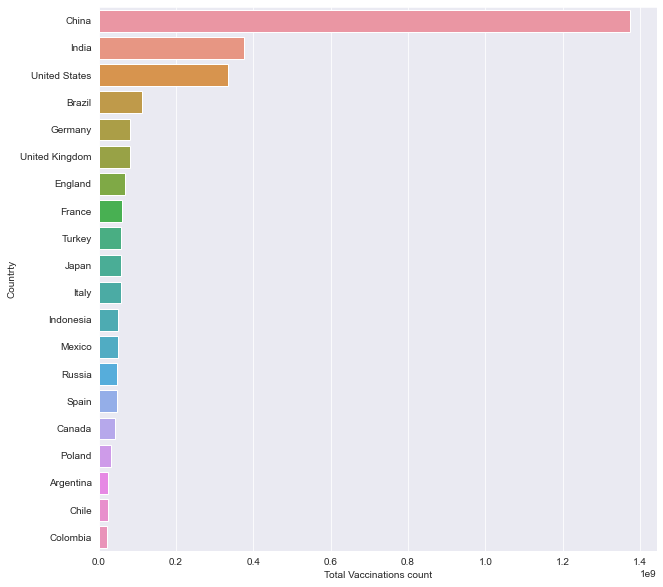

In [14]:
x = df.groupby('country')['total_vaccinations(count)'].mean().sort_values(ascending=False).head(20)
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
ax = sns.barplot(x.values,x.index)
ax.set_xlabel('Total Vaccinations count')
ax.set_ylabel('Countrty')
plt.show()

In [15]:
df.groupby('country')['people_fully_vaccinated'].mean().sort_values(ascending=False).head(20)

country
China                   2.232990e+08
United States           7.811818e+07
India                   2.688502e+07
United Kingdom          1.223949e+07
Brazil                  1.154170e+07
Russia                  9.601674e+06
England                 9.601224e+06
Turkey                  8.737801e+06
Germany                 8.328093e+06
France                  6.670030e+06
Indonesia               6.524447e+06
Mexico                  6.496831e+06
Italy                   6.264109e+06
Spain                   5.746511e+06
United Arab Emirates    4.970924e+06
Japan                   4.680092e+06
Chile                   4.602863e+06
Morocco                 4.516991e+06
Poland                  4.445922e+06
Israel                  3.920768e+06
Name: people_fully_vaccinated, dtype: float64

### people fully vaccinated

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


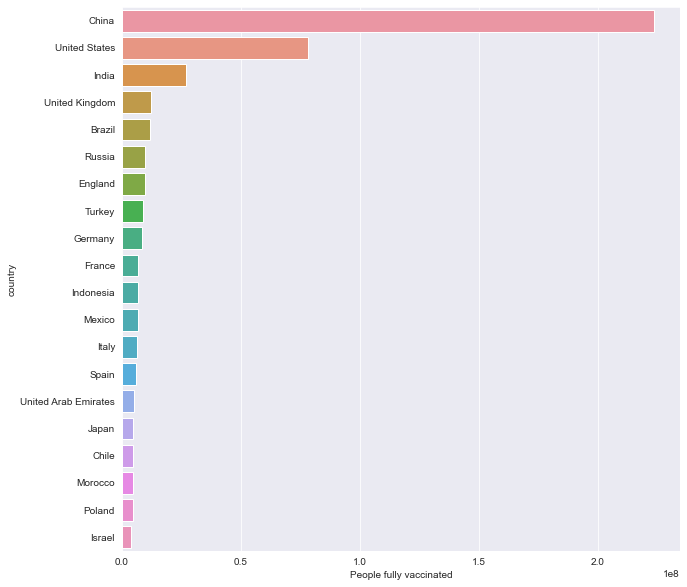

In [16]:
x = df.groupby('country')['people_fully_vaccinated'].mean().sort_values(ascending=False).head(20)
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
ax = sns.barplot(x.values,x.index)
ax.set_xlabel('People fully vaccinated')
ax.set_ylabel('country')
plt.show()

In [17]:
df.vaccines.unique()

array(['Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac, Sputnik V', 'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinopharm/Beijing',
       'CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'CanSino, Sinopharm/Beijing, Sinopha

In [18]:
df.vaccines.value_counts()

Oxford/AstraZeneca                                                                             4679
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  3997
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2609
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2153
Oxford/AstraZeneca, Pfizer/BioNTech                                                            1821
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1397
Moderna, Pfizer/BioNTech                                                                       1395
Pfizer/BioNTech                                                                                1299
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1174
Oxford/AstraZeneca, Sputnik V                                                                   614


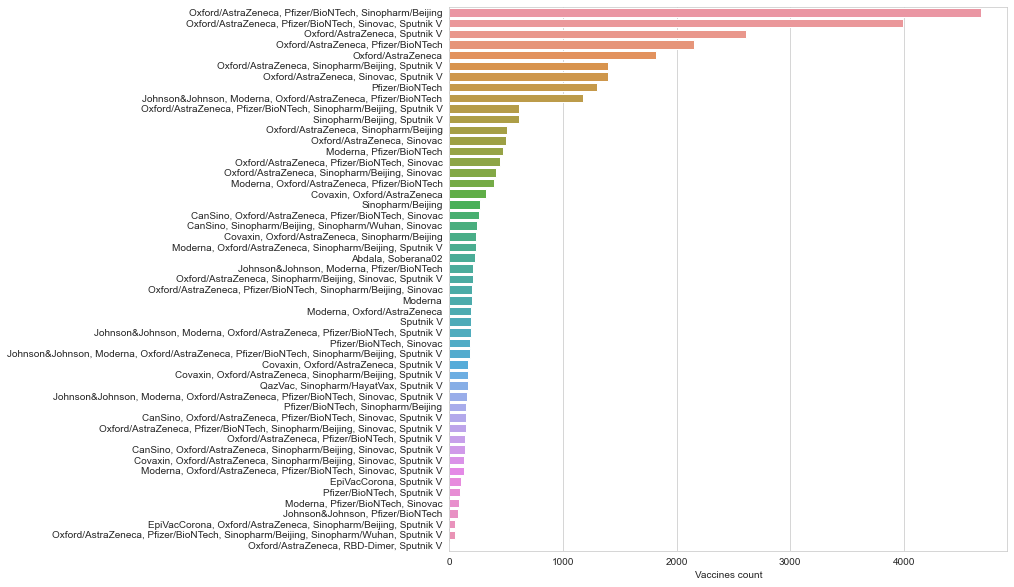

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = sns.barplot(x=df.vaccines.value_counts(),y=df.vaccines.unique())
ax.set_xlabel("Vaccines count")
ax.set_label("vaccines")
plt.show()

<AxesSubplot:xlabel='count', ylabel='vaccines'>

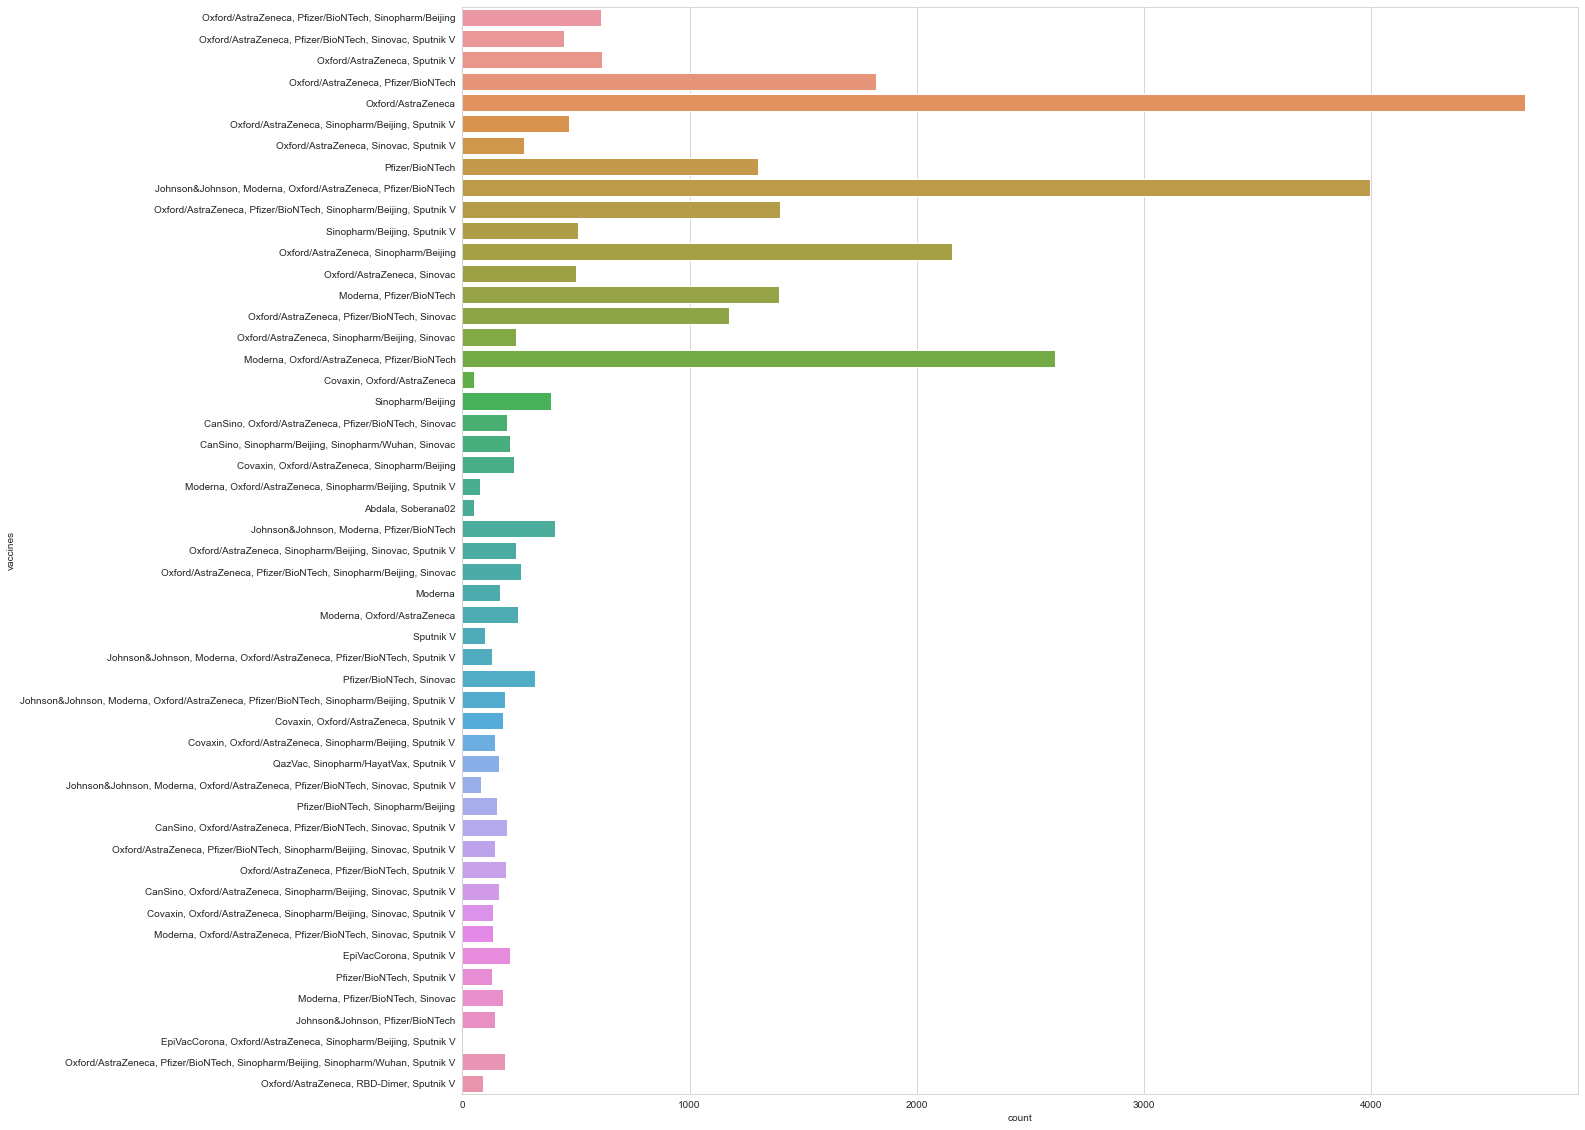

In [20]:
plt.figure(figsize=(20,20))
sns.countplot(y='vaccines',data=df)

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


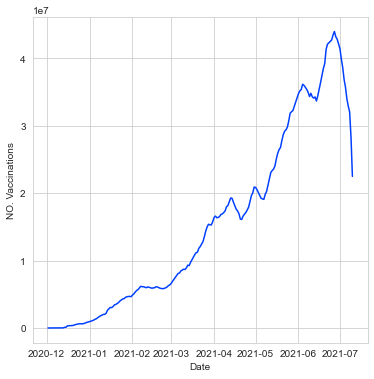

In [21]:
x = df.groupby('date')['daily_vaccinations'].sum()
plt.figure(figsize=(6,6))
plt.style.use('seaborn-bright')
ax = sns.lineplot(x.index,x.values)
ax.set_ylabel('NO. Vaccinations')
ax.set_xlabel('Date')
plt.show()

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


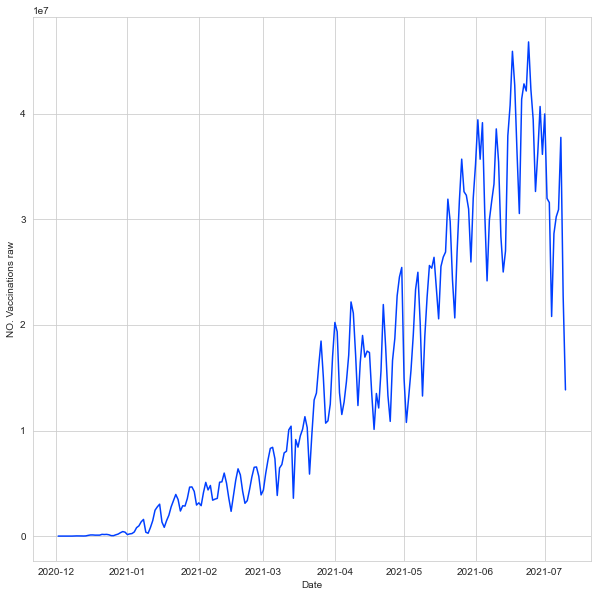

In [22]:
x = df.groupby('date')['daily_vaccinations_raw'].sum()
plt.figure(figsize=(10,10))
plt.style.use('seaborn-bright')
ax = sns.lineplot(x.index,x.values)
ax.set_ylabel('NO. Vaccinations raw')
ax.set_xlabel('Date')
plt.show()

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

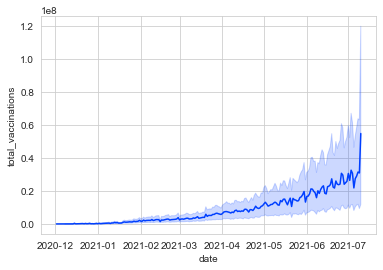

In [23]:
sns.lineplot(x='date',y='total_vaccinations',data=df)

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


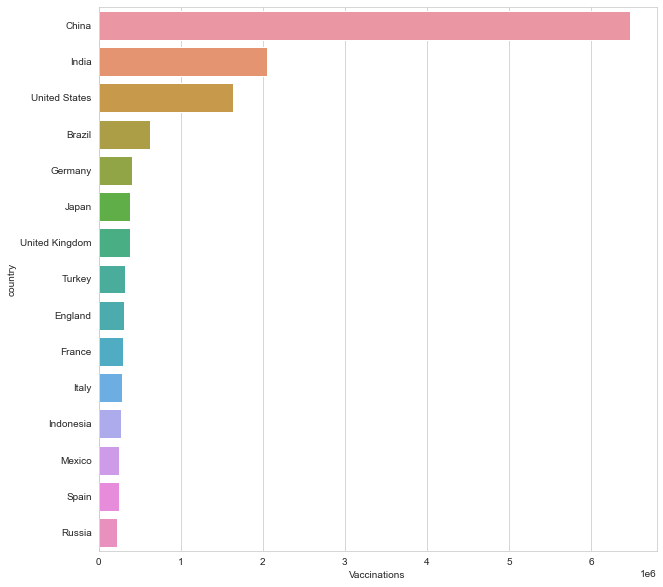

In [24]:
x = df.groupby('country')['daily_vaccinations'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,10))
plt.style.use('seaborn-bright')
ax = sns.barplot(x.values,x.index)
ax.set_ylabel('country')
ax.set_xlabel('Vaccinations')
plt.show()

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


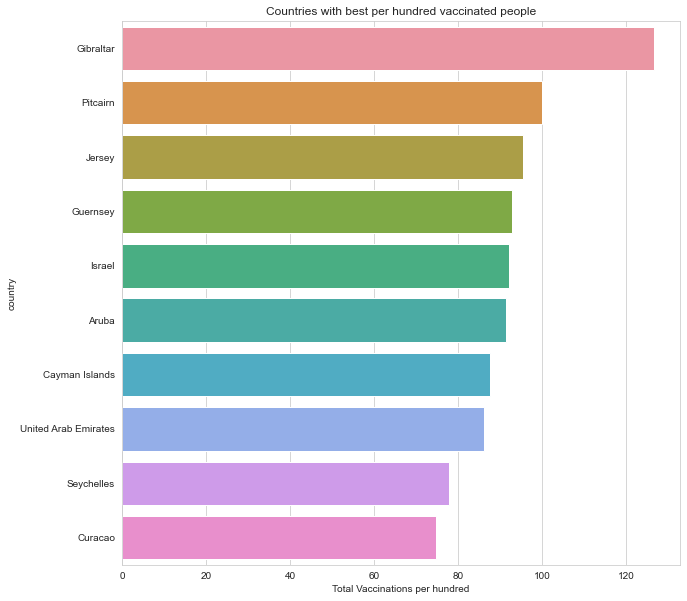

In [25]:
x = df.groupby('country')['total_vaccinations_per_hundred'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
plt.style.use('seaborn-bright')
ax = sns.barplot(x.values,x.index)
ax.set_ylabel('country')
ax.set_xlabel('Total Vaccinations per hundred')
ax.set_title('Countries with best per hundred vaccinated people')
plt.show()

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


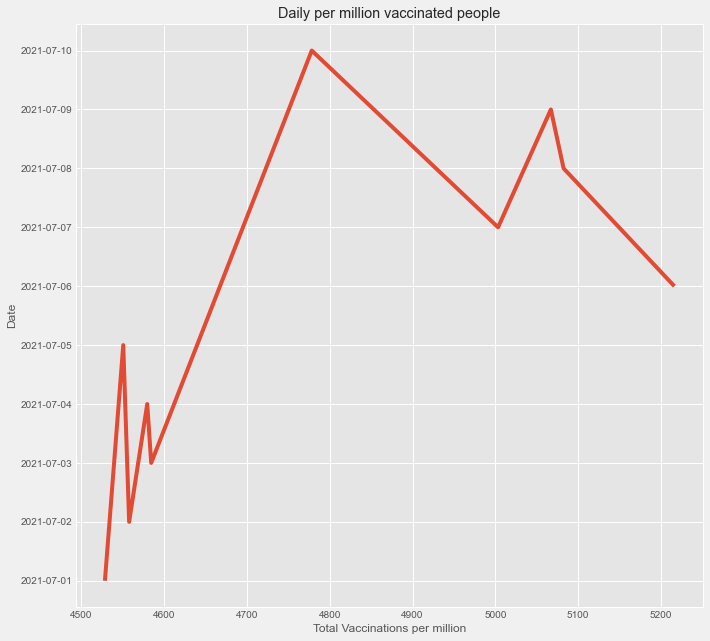

In [33]:
x = df.groupby('date')['daily_vaccinations_per_million'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.lineplot(x.values,x.index)
ax.set_ylabel('Date')
ax.set_xlabel('Total Vaccinations per million')
ax.set_title('Daily per million vaccinated people')
plt.show()

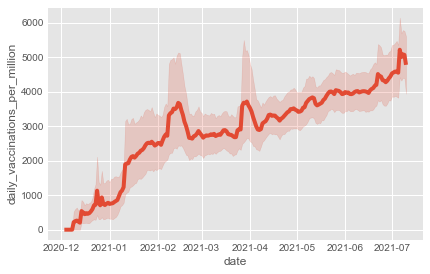

In [37]:
#or
plt.style.use('ggplot')
sns.lineplot(y='daily_vaccinations_per_million',x='date',data=df)
ax.set_ylabel('Date')
ax.set_xlabel('Total Vaccinations per million')
ax.set_title('Daily per million vaccinated people')
plt.show()

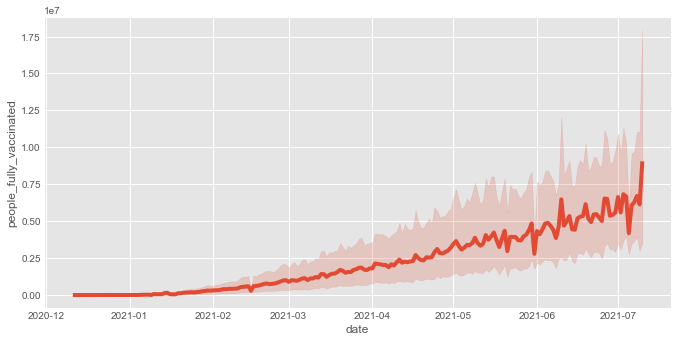

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.lineplot(y='people_fully_vaccinated',x='date',data=df)
ax.set_ylabel('People fully vaccinated')
ax.set_xlabel('Date')
ax.set_title('Fully vaccinated people')
plt.show()

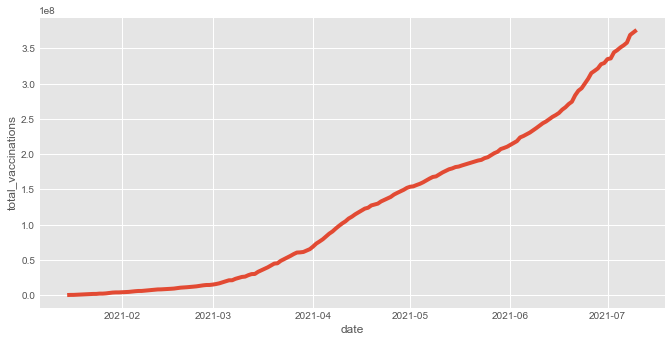

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.lineplot(y='total_vaccinations',x='date',data=df[df.country=='India'])
ax.set_ylabel('Date')
ax.set_xlabel('People Vacinated')
ax.set_title('Total vaccinations in India')
plt.show()

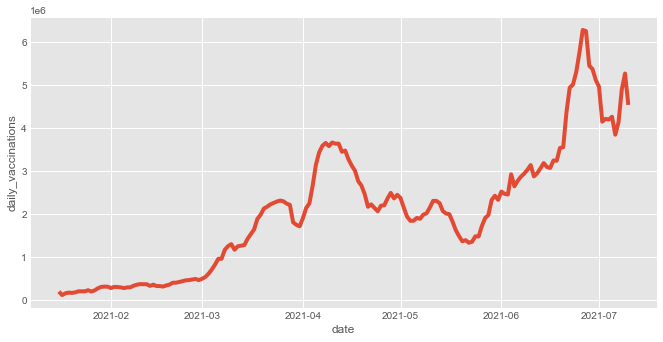

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
sns.lineplot(y='daily_vaccinations',x='date',data=df[df.country=='India'])
ax.set_ylabel('Date')
ax.set_xlabel('People Vacinated')
ax.set_title('Total daily vaccinations in India')
plt.show()

In [57]:
x = df[df.country=='India'].vaccines.value_counts()
list(x.index)

['Covaxin, Oxford/AstraZeneca, Sputnik V']

In [60]:
top= df.loc[(df.country=='China')|(df.country=='United States')|(df.country=='United Kingdom')|(df.country=='India')|(df.country=='Brazil')] 

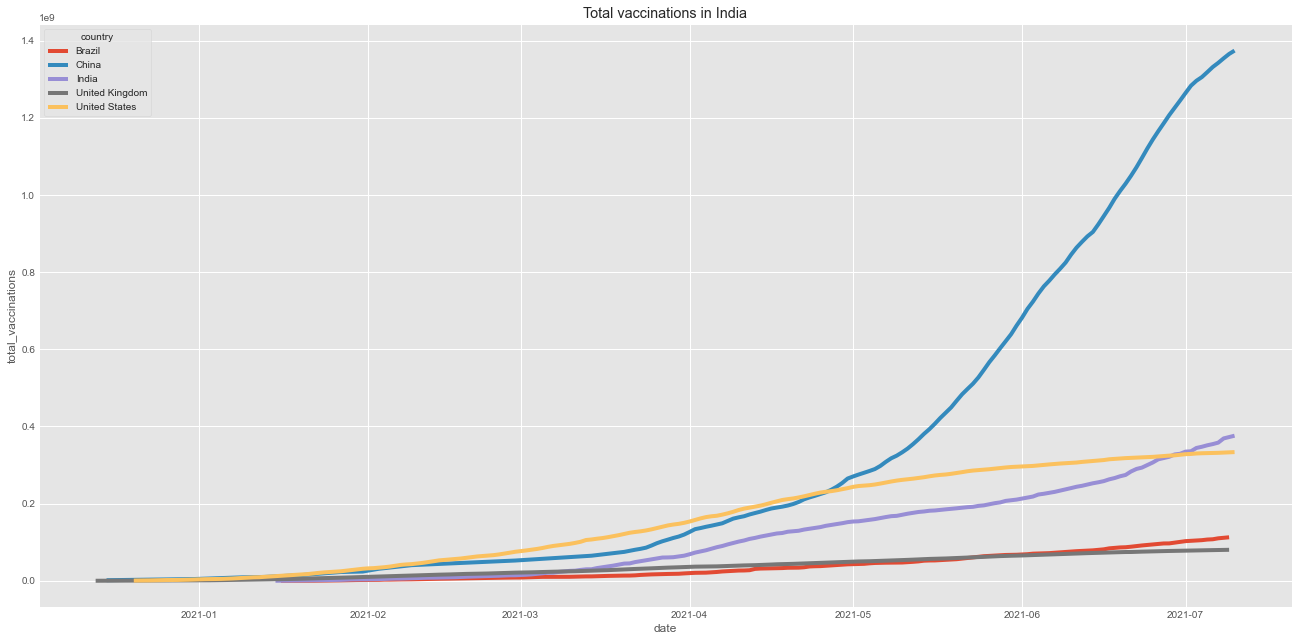

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.lineplot(y='total_vaccinations',x='date',data=top,hue='country')
ax.set_ylabel('Date')
ax.set_xlabel('People Vacinated')
plt.title('Total vaccinations in India')
plt.show()

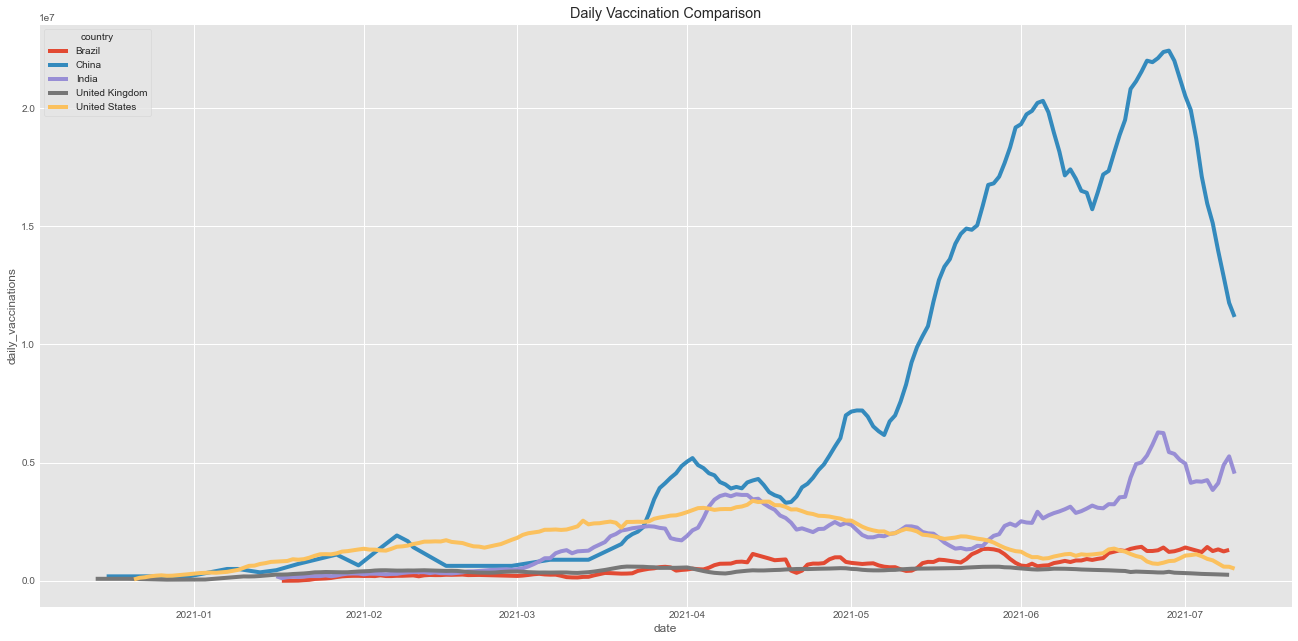

In [65]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.lineplot(y='daily_vaccinations',x='date',data=top,hue='country')
ax.set_ylabel('Date')
ax.set_xlabel('People Vacinated')
plt.title('Daily Vaccination Comparison')
plt.show()

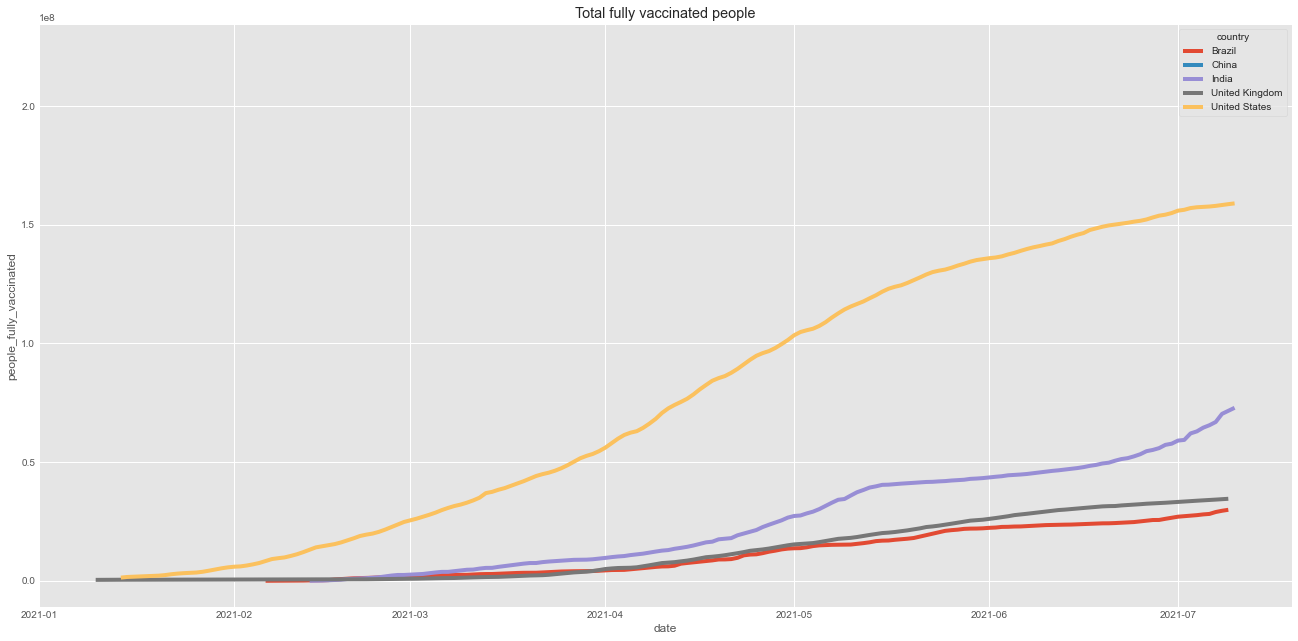

In [66]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.lineplot(y='people_fully_vaccinated',x='date',data=top,hue='country')
ax.set_ylabel('Date')
ax.set_xlabel('People Fully Vacinated')
plt.title('Total fully vaccinated people')
plt.show()

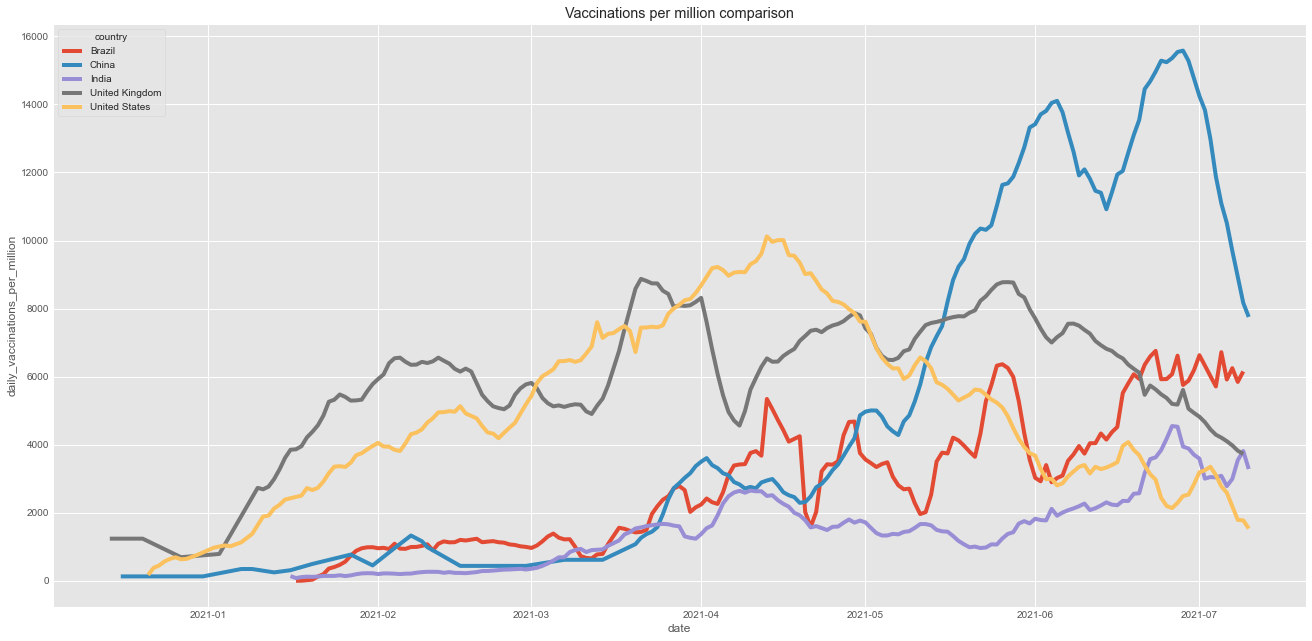

In [81]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.lineplot(y='daily_vaccinations_per_million',x='date',data=top,hue='country')
ax.set_ylabel('Date')
ax.set_xlabel('Per Million People Vacinated')
plt.title('Vaccinations per million comparison')
plt.show()

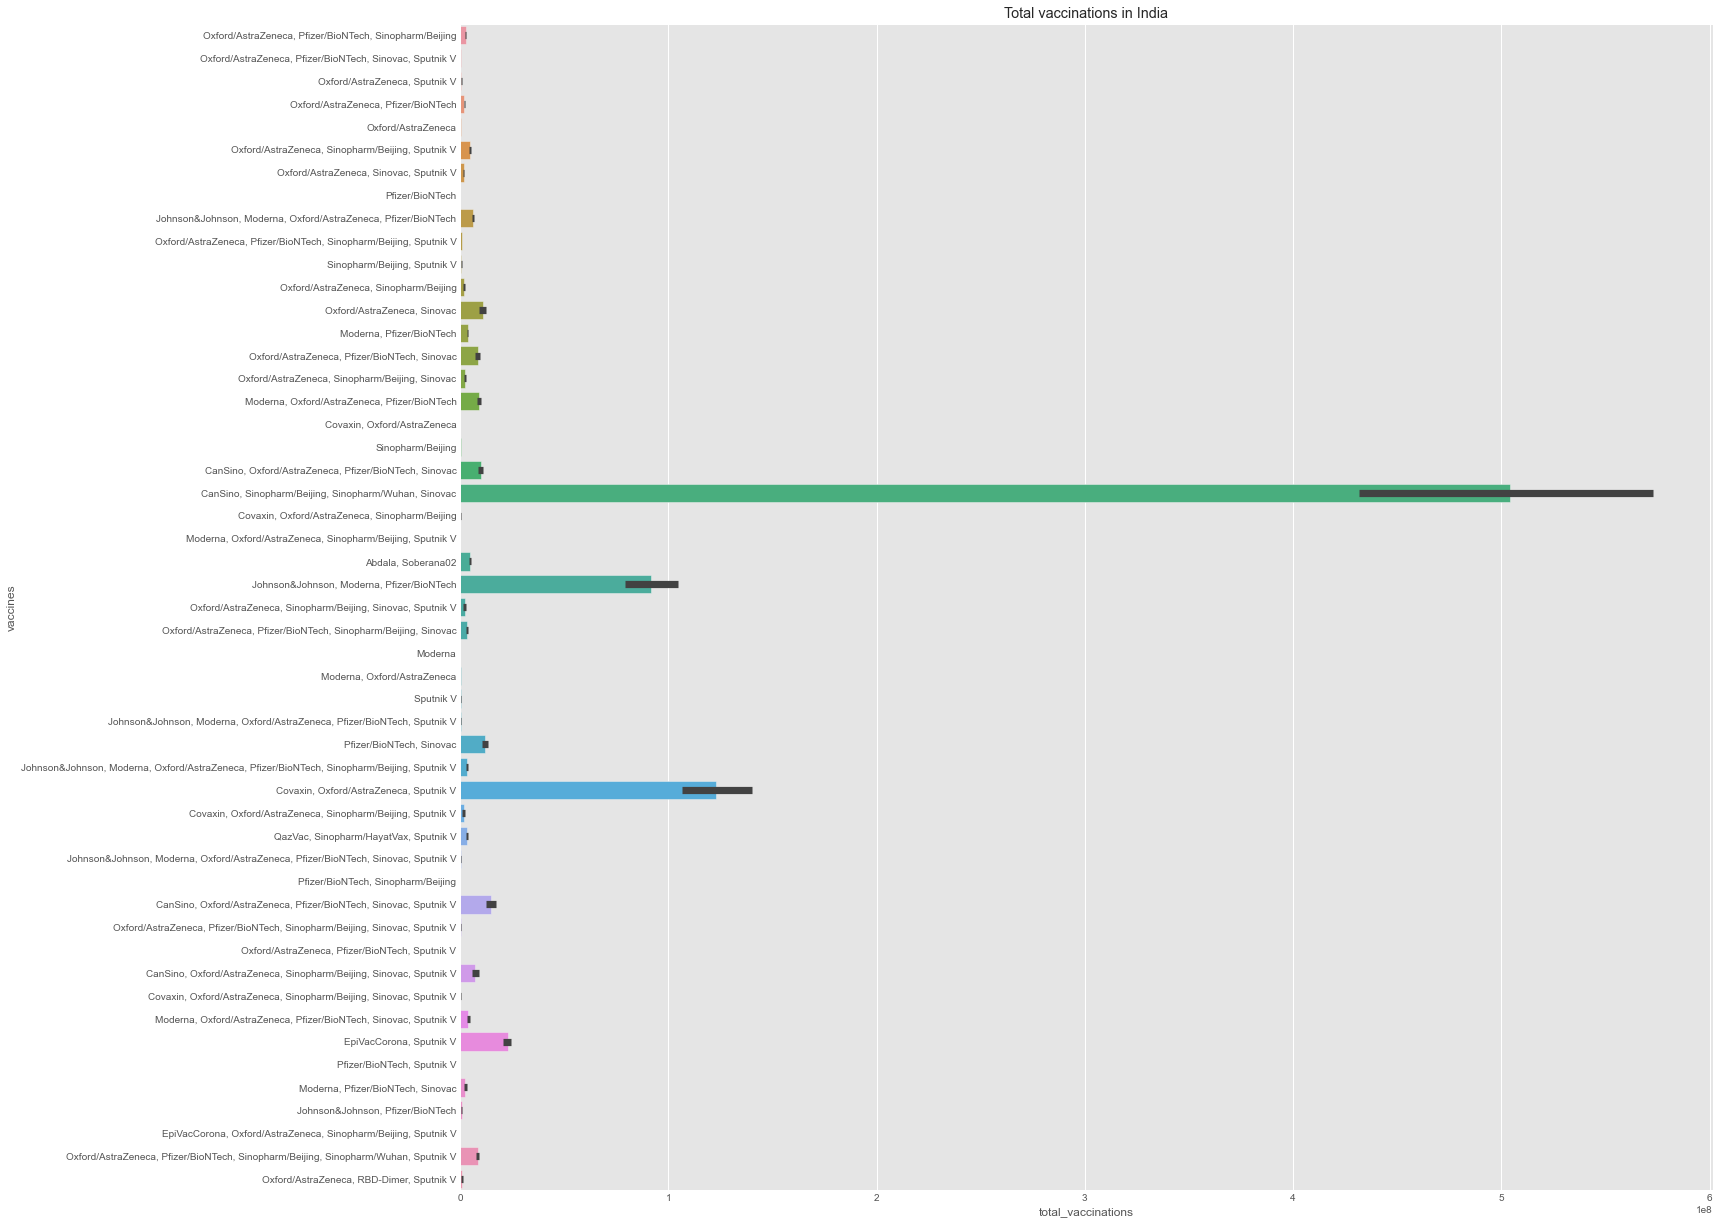

In [86]:
plt.style.use('ggplot')
plt.figure(figsize=(20,20))
sns.barplot(x='total_vaccinations',y='vaccines',data=df)
ax.set_ylabel('Date')
ax.set_xlabel('People Vacinated')
plt.title('Total vaccinations in India')
plt.show()


In [118]:
df['tot_vac_con'] = df.groupby('country').total_vaccinations.tail(1)
x = df.groupby('vaccines').tot_vac_con.mean().sort_values(ascending=False).head(10)
y = df.groupby('country')['total_vaccinations'].mean().sort_values(ascending=False).head(10)

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


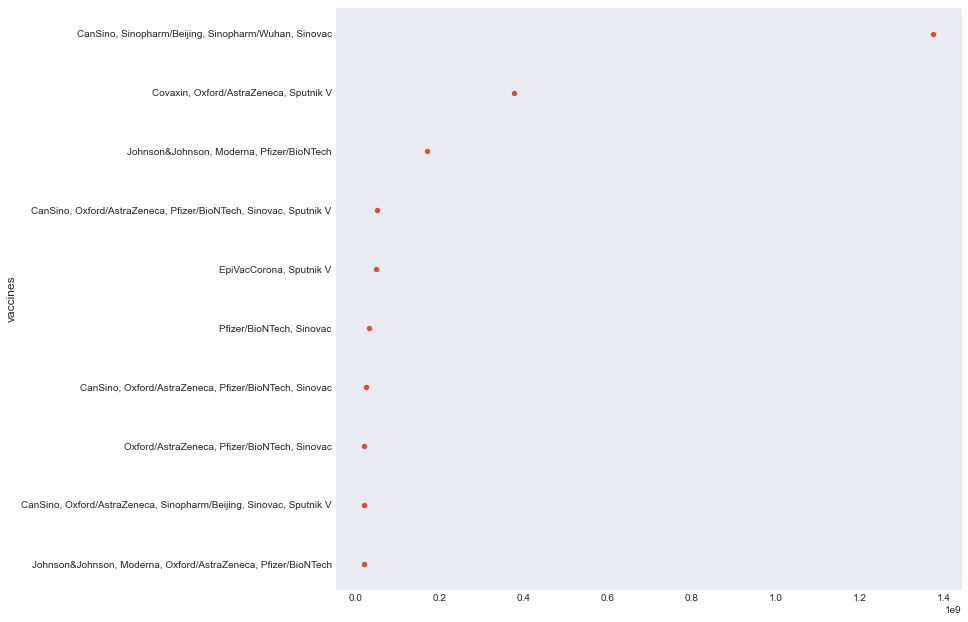

In [123]:
sns.set_style('dark')
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x.values,x.index)
plt.show()

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


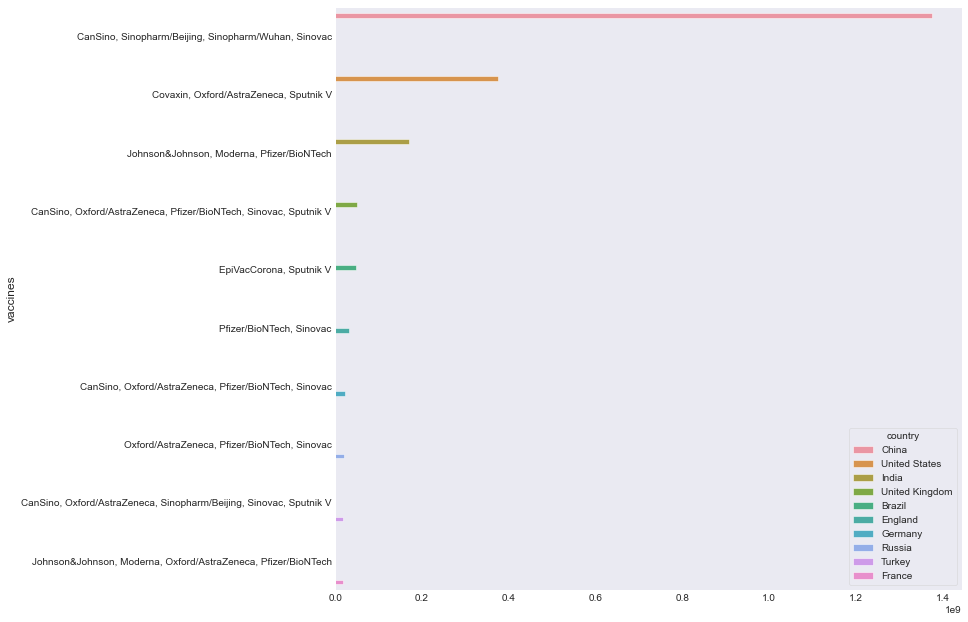

In [122]:
sns.set_style('dark')
plt.figure(figsize=(10,10))
ax = sns.barplot(x.values,x.index,hue=y.index)
plt.show()

In [124]:
df['tot_vac_con'] = df.groupby('vaccines').total_vaccinations.tail(1)
x = df.groupby('vaccines').tot_vac_con.mean().sort_values(ascending=False).head(10)
y = df.groupby('country')['total_vaccinations'].mean().sort_values(ascending=False).head(10)

C:\Users\subha\Anaconda\envs\prenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


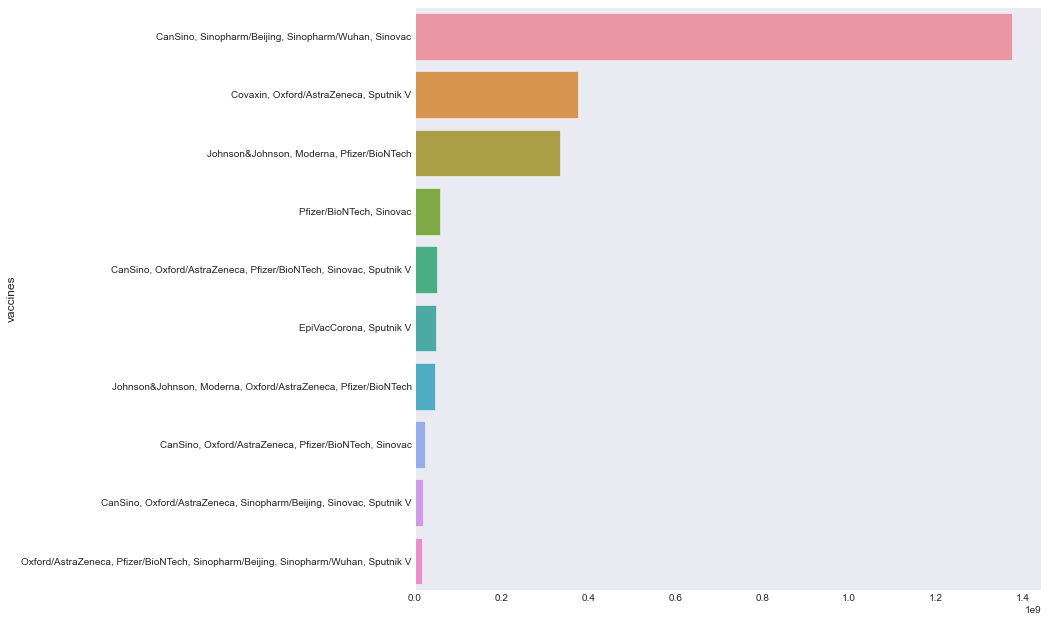

In [125]:
sns.set_style('dark')
plt.figure(figsize=(10,10))
ax = sns.barplot(x.values,x.index)
plt.show()